In [194]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline



In [226]:
X_SIZE=128
Y_SIZE=128

ITERATIONS = 10000

MEASURE_INTERVAL = 100

betas = [0.35, 0.36, 0.37, 0.38, \
         0.39, 0.40, 0.41, 0.42, \
         0.43, 0.44, 0.45, 0.46, \
         0.47, 0.48, 0.49, 0.50]

size = (X_SIZE, Y_SIZE)

lattice = np.random.randint(low = 0, high = 2, size=size) * 2 - 1

mask = np.ones_like(lattice)

mask[::2, ::2] = 0
mask[1::2, 1::2] = 0

AVG Spectrum [ 11.640625    10.84303746  10.50929839  11.39096132  11.05406511
  10.28282454   9.0371571    7.97704087   7.75943134   7.3859125
   7.48616546   6.85387224   7.08542221   6.15727183   6.0596053
   6.26553555   6.13126554   5.78154834   5.18572954   5.18791706
   5.25211884   5.89612402   4.89240979   5.08993598   4.540083
   4.67439126   4.63785765   4.99366172   4.62267947   4.15597937
   4.55324204   4.46860856   3.796875     4.46860856   4.55324204
   4.15597937   4.62267947   4.99366172   4.63785765   4.67439126
   4.540083     5.08993598   4.89240979   5.89612402   5.25211884
   5.18791706   5.18572954   5.78154834   6.13126554   6.26553555
   6.0596053    6.15727183   7.08542221   6.85387224   7.48616546
   7.3859125    7.75943134   7.97704087   9.0371571   10.28282454
  11.05406511  11.39096132  10.50929839  10.84303746]
AVG Spectrum [ 10.8125      12.27466667  13.5184221   10.20780225  10.13061197
   8.39652462   8.44395452   9.0497256    7.57610924   7.94790779


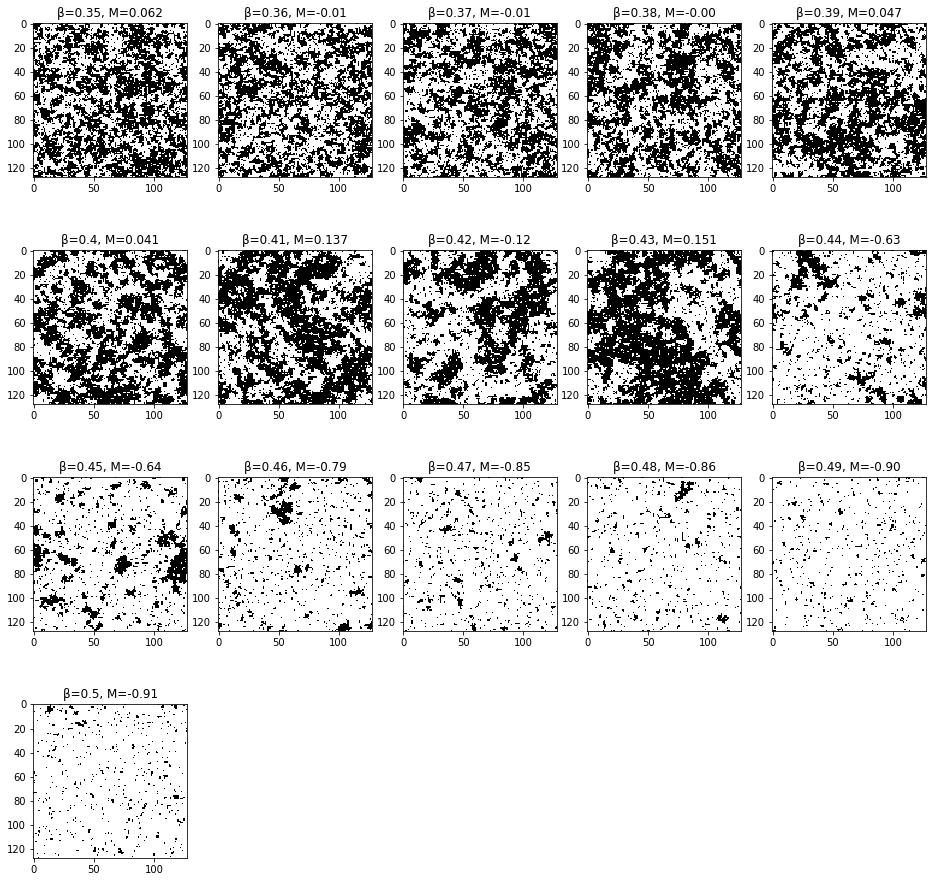

In [228]:
fig = plt.figure(figsize=(16, 16))

# Execute a step
for betaId in range(0, len(betas)):
    beta = betas[betaId]
    for i in range(1, ITERATIONS + 1):
        for sublattice in [False, True]:
            neighbors = np.roll(lattice, 1, 0) \
                       + np.roll(lattice, -1, 0) \
                       + np.roll(lattice, 1, 1) \
                       + np.roll(lattice, -1, 1)
            energy = 2 * lattice * neighbors
            boltzman = np.exp(- beta * energy)
            randoms = np.random.random(size)
            flip = (randoms < boltzman) | (boltzman >= 1)
            flip[mask == sublattice] = False
            lattice[flip] *= -1

    # Measure magnetization
    mag = np.mean(lattice)
    
    # Plot the final state
    fig.add_subplot(4,len(betas)/4 + 1, betaId + 1)
    plt.imshow(lattice, cmap='binary')
    plt.title(u"β=" + str(beta) + ", M=" + str(mag)[0:5])
    
    # Do an FFT to figure out the correlation function
    inv=np.fft.fft(lattice, n = X_SIZE / 2, axis = 1)
    #print "Inv", inv
    # Don't care about the phase just amplitude
    length = np.sqrt(inv.real ** 2 + inv.imag ** 2)
    #print "Len", length
    # Since the FFT was run over the last dimension find average of frequency spectrum along the first
    avg = np.mean(length, axis = 0)
    print "AVG Spectrum", avg
    # Now find the peak amplitude
    max = np.max(avg)
    #print "Max", max
    # Finally the position that will give us the peak frequency
    freq = np.where(avg == max)
    # Just pick the first one
    #print "Freq", freq[0][0]
